In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

from SeparationBarrier import SeparationBarrierModel
from mesa.batchrunner import BatchRunner

In [77]:
parameters = {
    "height": 40, 
    "width": 40, 
    "settlement_density": 0.3, 
    "palestinian_density": 0.2, 
    "settlers_violence_rate": 0.01,
    "settler_vision": 5,
    "palestinian_vision": 5,
    "settlers_growth_rate": 0.01,
    "suicide_rate": 0.001,
    "greed_level": range(0,11)    
}

def get_settler_occupation(model):
    settlers = 0
    for agent in model.schedule.agents:
        if agent.breed == "Settler":
            settlers += 1
        
    occupation = settlers / (model.grid.width * model.grid.height)
    print("%d Settlers / (%d * %d) = %f" % (settlers, model.grid.width, model.grid.height, occupation))
    return occupation

model_reporters = {
    "total_violence": lambda m: m.total_violence,  
    "settlers_occupation" : get_settler_occupation
}

In [78]:
param_sweep = BatchRunner(SeparationBarrierModel, parameters, iterations=100, 
                          max_steps=2000,
                          model_reporters=model_reporters)

In [79]:
param_sweep.run_all()

Total Violence:  247
Total Violence:  435
Total Violence:  554
Total Violence:  593
Total Violence:  602
Total Violence:  603
Total Violence:  607
Total Violence:  609
Total Violence:  609
257 Settlers / (40 * 40) = 0.160625
Total Violence:  242
Total Violence:  431
Total Violence:  504
Total Violence:  533
Total Violence:  540
Total Violence:  543
Total Violence:  545
Total Violence:  548
Total Violence:  549
Total Violence:  550
Total Violence:  553
Total Violence:  553
243 Settlers / (40 * 40) = 0.151875
Total Violence:  237
Total Violence:  418
Total Violence:  486
Total Violence:  513
Total Violence:  524
Total Violence:  541
Total Violence:  541
217 Settlers / (40 * 40) = 0.135625
Total Violence:  249
Total Violence:  438
Total Violence:  482
Total Violence:  502
Total Violence:  514
Total Violence:  536
Total Violence:  551
Total Violence:  552
Total Violence:  553
Total Violence:  553
261 Settlers / (40 * 40) = 0.163125
Total Violence:  244
Total Violence:  441
Total Violence: 

In [83]:
df = param_sweep.get_model_vars_dataframe()

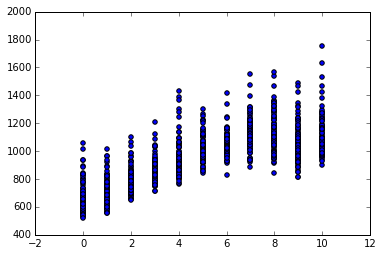

In [84]:
plt.scatter(df.greed_level, df.total_violence)

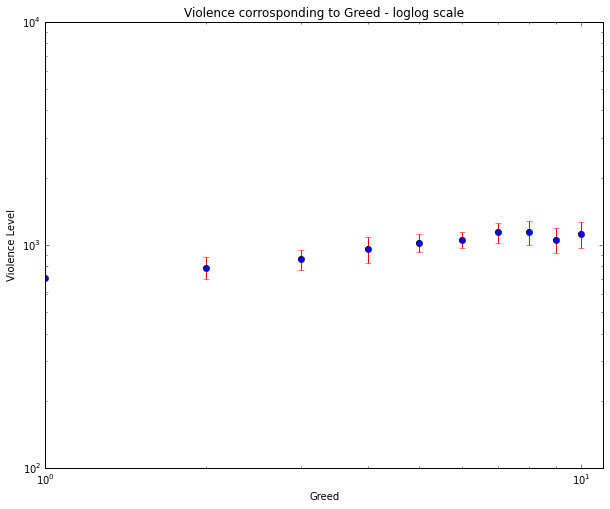

In [142]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 8


g = df.groupby('greed_level').mean()
s = df.groupby('greed_level').std()
plt.errorbar(x=range(0,11), y=g.total_violence, yerr = s.total_violence, ecolor='r', fmt = 'o')
plt.title("Violence corrosponding to Greed - loglog scale")
plt.ylabel("Violence Level")
plt.xlabel("Greed")
plt.xscale('log')
plt.yscale('log')
plt.xlim(-0.5, 11)
plt.scatter(range(0,11),g.total_violence)

(-0.5, 11)

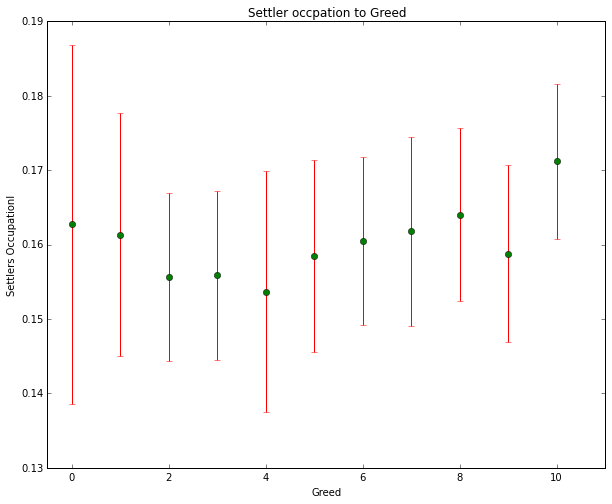

In [131]:
g2 = df.groupby('greed_level').mean()
s2 = df.groupby('greed_level').std()
plt.errorbar(x=range(0,11), y=g2.settlers_occupation, yerr = s2.settlers_occupation, ecolor='r', fmt = 'og')
plt.title("Settler occpation to Greed")
plt.ylabel("Settlers Occupationl")
plt.xlabel("Greed")
plt.xlim(-0.5, 11)